# Solanki, Shivam -- Homework 3


**Due in class on Wed 6th March**

We study Table 13.2 on p240 of Lange and Chapter 13 Question 11 (p240) and Chapter 14, Example 14.10.1 (p264).

The table contains counts of the number of days a given number of deaths occurred. 

In [6]:
import numpy as np
freq = np.array([162,267,271,185,111,61,27,8,3,1])
deaths = np.arange(10)
λ = sum(deaths*freq)/sum(freq)

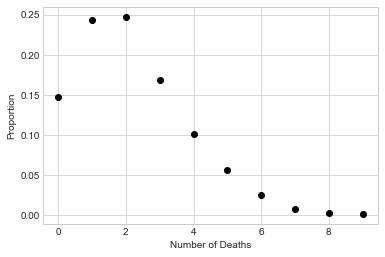

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

## proportion of different number of deaths
plt.plot(np.arange(freq.size), freq/np.sum(freq), 'o', color='black')
plt.xlabel("Number of Deaths")
plt.ylabel("Proportion");

## Problem 1

Confirm Lange's claim in question 11 that "A Poisson distribution gives a poor fit to these data . . ." by computing the MLE of the Poisson parameter $\lambda$ (this should be done by hand using calculus) and plotting the resulting probability mass function over the observed data. They should be a bit discrepant (thus justifying the claim).

### Answer 1


Poission Probability Mass distribution

f(x1,...,xn|λ) = (e^(-λ)λ^(x1))/(x1!)...(e^(-λ)λ^(xn))/(xn!)
                 = (e^(-λ)λ^(Σxi))/(x1!...xn!) 

Taking natural log on both side, we get, 

 ln(f) = -nλ+(lnλ)Σ xi-ln(∏ xi!) 

Differentiate with respect to  λ  to maximize the log function of  𝑙𝑛(f)

 (d(lnf))/λ =-n+(Σxi)/λ =0 
 
  λ^=(Σxi)/n
     
    = 𝑋¯
    
    = (162×0)+(267×1)+(271×2)+(185×3)+(111×4)+(61×5)+(27×6)+(8×7)+(3×8)+(1×9)/(162+267+271+185+111+61+27+8+3+1)
    
    = 2.157
    
 Thus we have an estimate of  𝜆 = 2.157

In [12]:
import math 
pmf = []
cls = np.arange(10)
for i in range(10):
    x = cls[i] 
    f = ((λ**x)*np.exp(-(λ)))/ math.factorial(x)
    pmf.append(f)

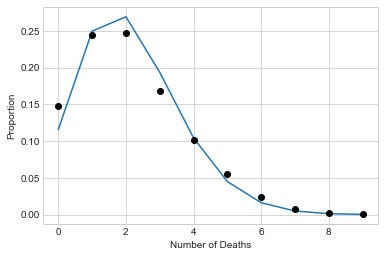

In [13]:
mle_poisson = pmf
plt.plot(np.arange(10), mle_poisson)
plt.plot(np.arange(freq.size), freq/np.sum(freq), 'o', color='black')
plt.xlabel("Number of Deaths")
plt.ylabel("Proportion");

## Problem 2

Fit the $\alpha$, $\mu_1$ and $\mu_2$ parameters for the mixture of two Poissons model proposed in Question 11 using a gradient ascent algorithm. You must write your own fitting code (you cannot use `scipy optimize` or R `optim`). Discuss how you select starting parameters and monitor convergence. Include a plot to illustrate the convergence for different starting values of the parameters. You can confirm your results by also using Python or R built in optimizers.

$L(\alpha, \mu_1, \mu_2) = {\displaystyle\prod_{i=0}^{9} \bigg[\alpha e^{-\mu_1} \frac{\mu_1^i}{i!} + (1-\alpha) e^{-\mu_2} \frac{\mu_2^i}{i!} \bigg]^{n_i}}$

$f = ln(L(\alpha, \mu_1, \mu_2)) = {\displaystyle\sum_{i=0}^{9} n_i ln}\bigg[\alpha e^{-\mu_1} \frac{\mu_1^i}{i!} + (1-\alpha) e^{-\mu_2} \frac{\mu_2^i}{i!} \bigg] $ 

In [14]:
def dydx(x0, i, ni):
    '''compute the differentiation of the Likelihood function with respect to alpha, mu1 and mu2
    Args: array x0 having alpha, mu1 and mu2
          i and ni in the parameters of the mixture of two Poissons model
    Returns: array having derivative of alpha, mu1 and mu1 
    '''
    alpha = x0[0]
    mu1 = x0[1]
    mu2 = x0[2]
    
    #Computing Numerator values of the delta f with respect to alpha, mu1 and mu2
    num_alpha = np.exp(-mu1) * mu1**i - np.exp(-mu2) * mu2**i
    num_mu1 = alpha*np.exp(-mu1)*mu1**i *(i/mu1 - 1)
    num_mu2 = alpha*np.exp(-mu2)*mu2**i *(i/mu2 - 1)
    
    #Computing denominator values of the delta f with respect to alpha, mu1 and mu2
    denom = alpha*np.exp(-mu1)*mu1**i + (1-alpha)*np.exp(-mu2)*mu2**i
    
    dydx_alpha = sum(ni*num_alpha/denom)
    dydx_mu1 = sum(ni*num_mu1/denom)
    dydx_mu2 = sum(ni*num_mu2/denom)
    
    dif =  np.array([dydx_alpha, dydx_mu1, dydx_mu2])
    
    return dif

In [72]:
def gradient_ascent(x0, rate):
    """Gradient ascent algorithm to compute the estimates which maximize the MLE function
    Args: array x0 having alpha, mu1 and mu2
           rate for gradient ascent
    Return: aplha, mu1, mu2 and step size"""
    step = 0
    d = [100, 100, 100]
    x_values = []
    while d[0] and d[1] and d[2] > 0:
        x_old = np.array(x0)
        x0 = x0 + rate*dydx(x0, deaths, freq)
        x_values.append(x0)
        d = abs(x0 - x_old)
        step += 1
    print("Estimated alpha = " + str(x0[0]) +".");
    print("Estimated mu1 = " + str(x0[1]) +".");
    print("Estimated mu2 = " + str(x0[2])+ ".");
    print("Total step size = " + str(step) +".");
    return np.array(x_values)

Estimated alpha = 0.3598853969848012.
Estimated mu1 = 1.2560951012240997.
Estimated mu2 = 2.663404356632308.
Total step size = 14170.


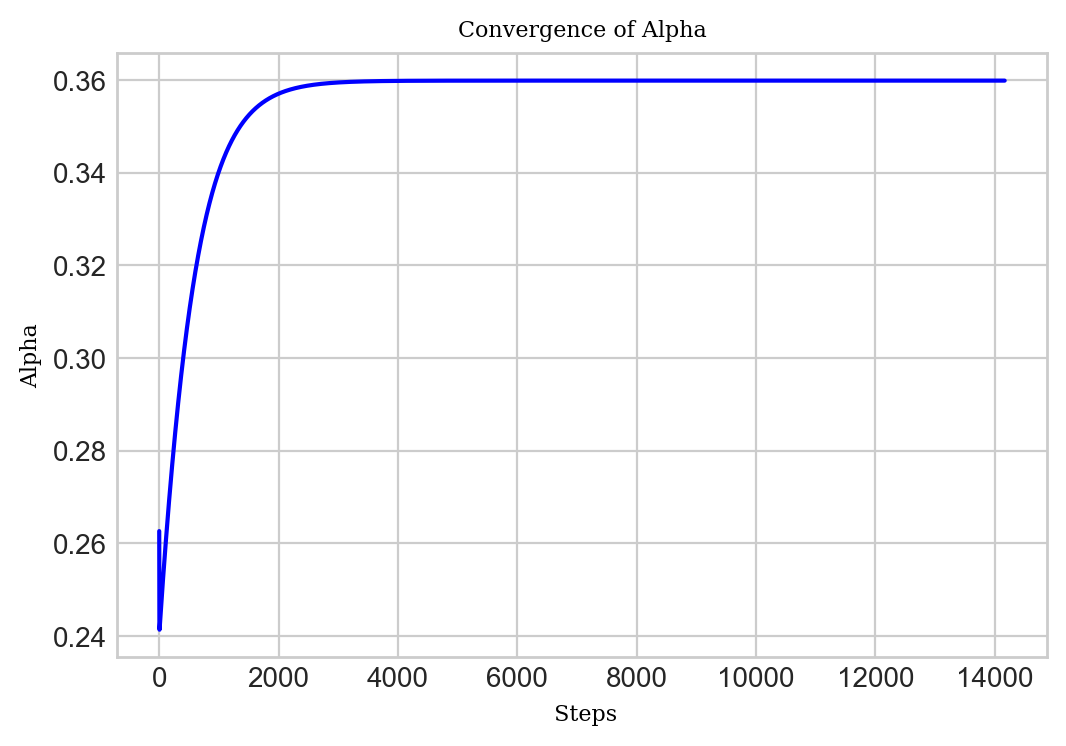

In [73]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(6, 4), dpi=200, facecolor='w', edgecolor='k')
font = {'family': 'serif','color':  'black','weight': 'normal', 'size': 8,}
x0 = np.array([0.3, 1, 2.5])
points_grad_ascent = gradient_ascent(x0, rate=0.0005)
plt.xlabel(" Steps", fontdict= font)
plt.ylabel("Alpha", fontdict= font)
plt.title("Convergence of " + "Alpha", fontdict=font)
plt.plot(points_grad_ascent.T[0], color= "blue")
plt.show()

Estimated alpha = 0.3598853969848012.
Estimated mu1 = 1.2560951012240997.
Estimated mu2 = 2.663404356632308.
Total step size = 14170.


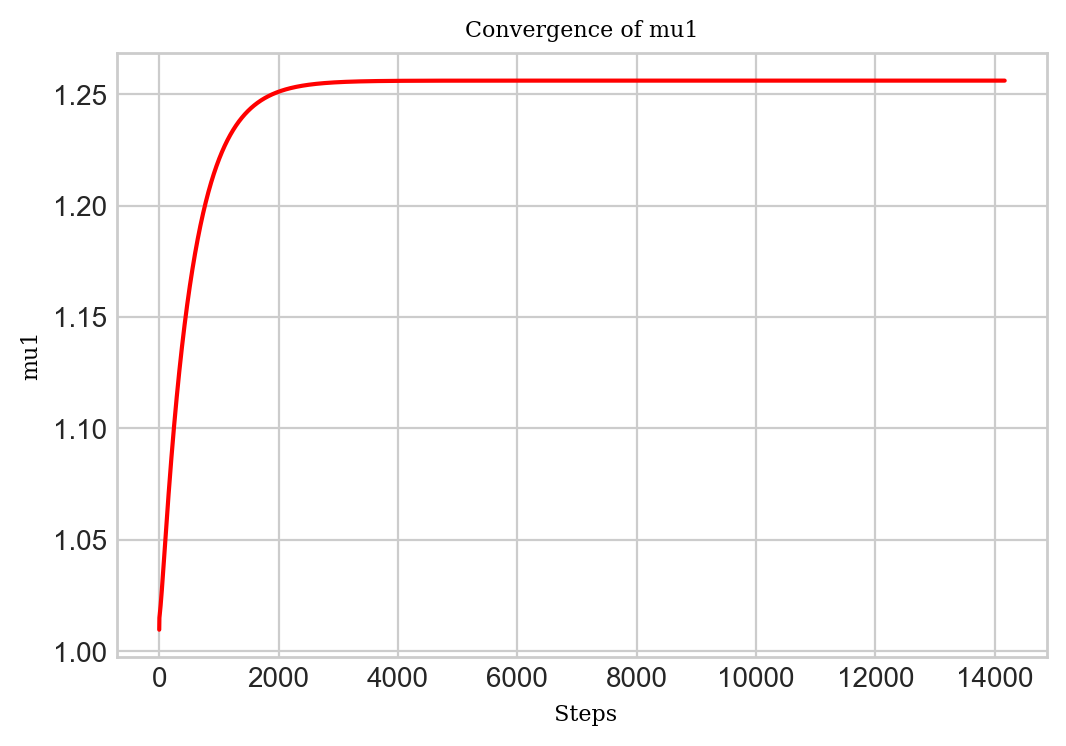

In [74]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(6, 4), dpi=200, facecolor='w', edgecolor='k')
font = {'family': 'serif','color':  'black','weight': 'normal', 'size': 8,}
x0 = np.array([0.3, 1, 2.5])
points_grad_ascent = gradient_ascent(x0, rate=0.0005)
plt.xlabel(" Steps", fontdict= font)
plt.ylabel("mu1", fontdict= font)
plt.title("Convergence of " + "mu1", fontdict=font)
plt.plot(points_grad_ascent.T[1], color= "red")
plt.show()

Estimated alpha = 0.3598853969848012.
Estimated mu1 = 1.2560951012240997.
Estimated mu2 = 2.663404356632308.
Total step size = 14170.


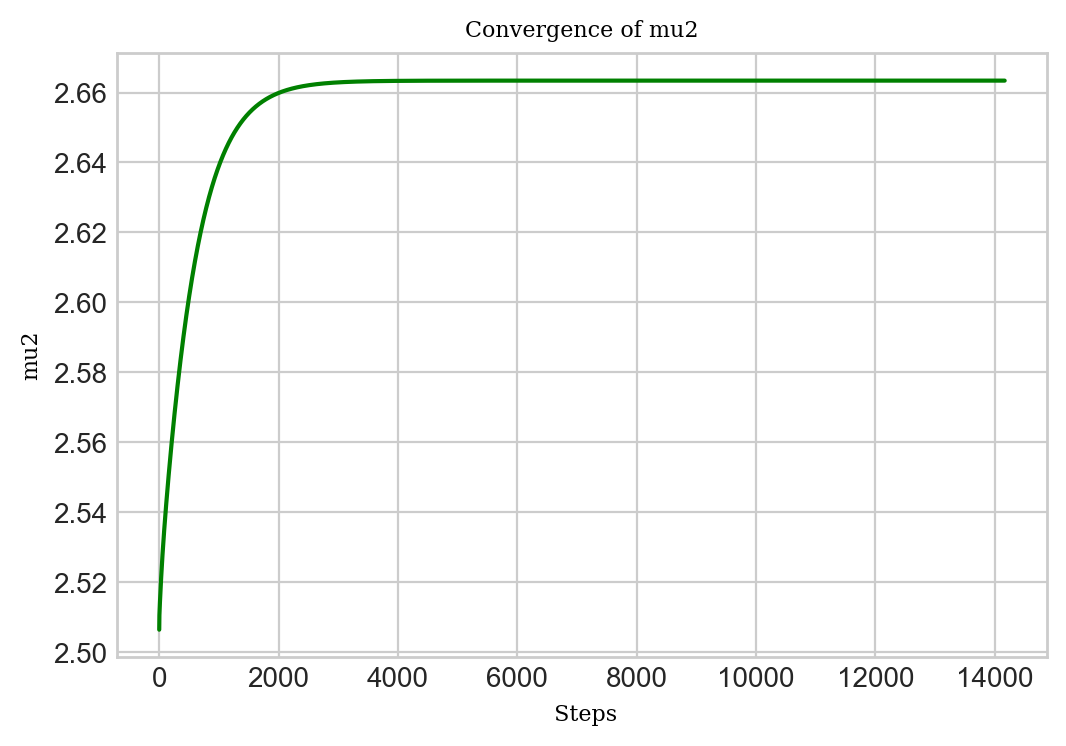

In [75]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(6, 4), dpi=200, facecolor='w', edgecolor='k')
font = {'family': 'serif','color':  'black','weight': 'normal', 'size': 8,}
x0 = np.array([0.3, 1, 2.5])
points_grad_ascent = gradient_ascent(x0, rate=0.0005)
plt.xlabel(" Steps", fontdict= font)
plt.ylabel("mu2", fontdict= font)
plt.title("Convergence of " + "mu2", fontdict=font)
plt.plot(points_grad_ascent.T[2], color= "green")
plt.show()

Estimated alpha = 9.807910831424227.
Estimated mu1 = -33.02996582114541.
Estimated mu2 = 1.8261506756944084.
Total step size = 87.


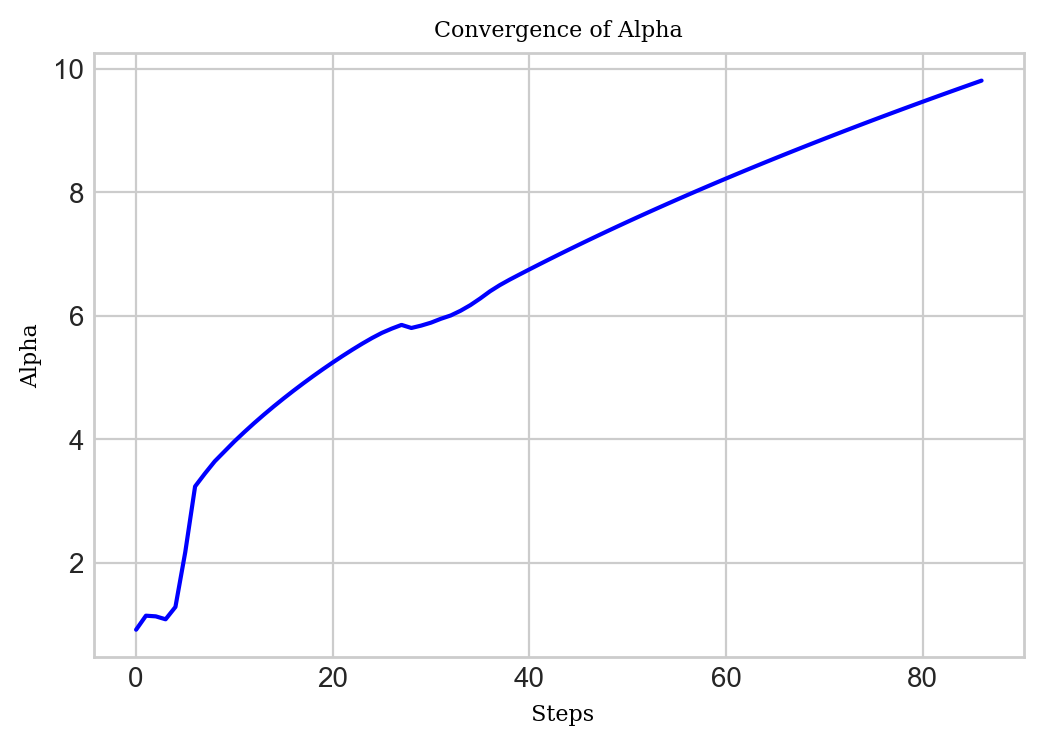

In [76]:
x1 = np.array([0.5, 3, 5])
figure(num=None, figsize=(6, 4), dpi=200, facecolor='w', edgecolor='k')
font = {'family': 'serif','color':  'black','weight': 'normal', 'size': 8,}
points_grad_ascent = gradient_ascent(x1, rate=0.0005)
plt.xlabel(" Steps", fontdict= font)
plt.ylabel("Alpha", fontdict= font)
plt.title("Convergence of " + "Alpha", fontdict=font)
plt.plot(points_grad_ascent.T[0], color= "blue")
plt.show()

Estimated alpha = 9.807910831424227.
Estimated mu1 = -33.02996582114541.
Estimated mu2 = 1.8261506756944084.
Total step size = 87.


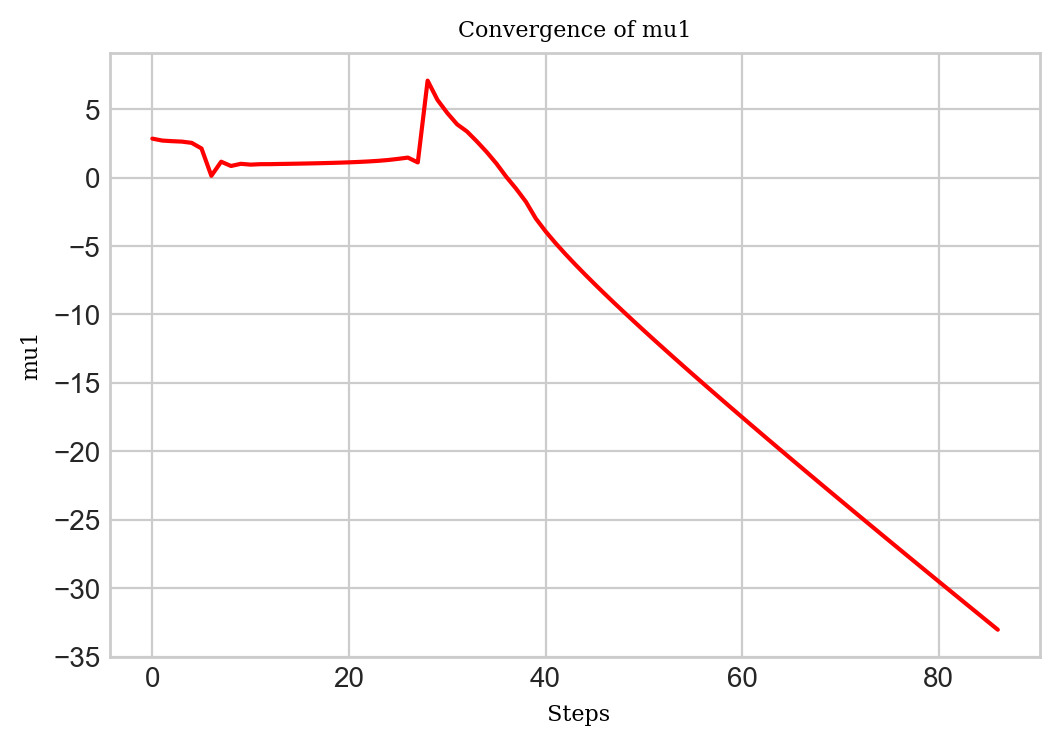

In [77]:
x1 = np.array([0.5, 3, 5])
figure(num=None, figsize=(6, 4), dpi=200, facecolor='w', edgecolor='k')
font = {'family': 'serif','color':  'black','weight': 'normal', 'size': 8,}
points_grad_ascent = gradient_ascent(x1, rate=0.0005)
plt.xlabel(" Steps", fontdict= font)
plt.ylabel("mu1", fontdict= font)
plt.title("Convergence of " + "mu1", fontdict=font)
plt.plot(points_grad_ascent.T[1], color= "red")
plt.show()

Estimated alpha = 9.807910831424227.
Estimated mu1 = -33.02996582114541.
Estimated mu2 = 1.8261506756944084.
Total step size = 87.


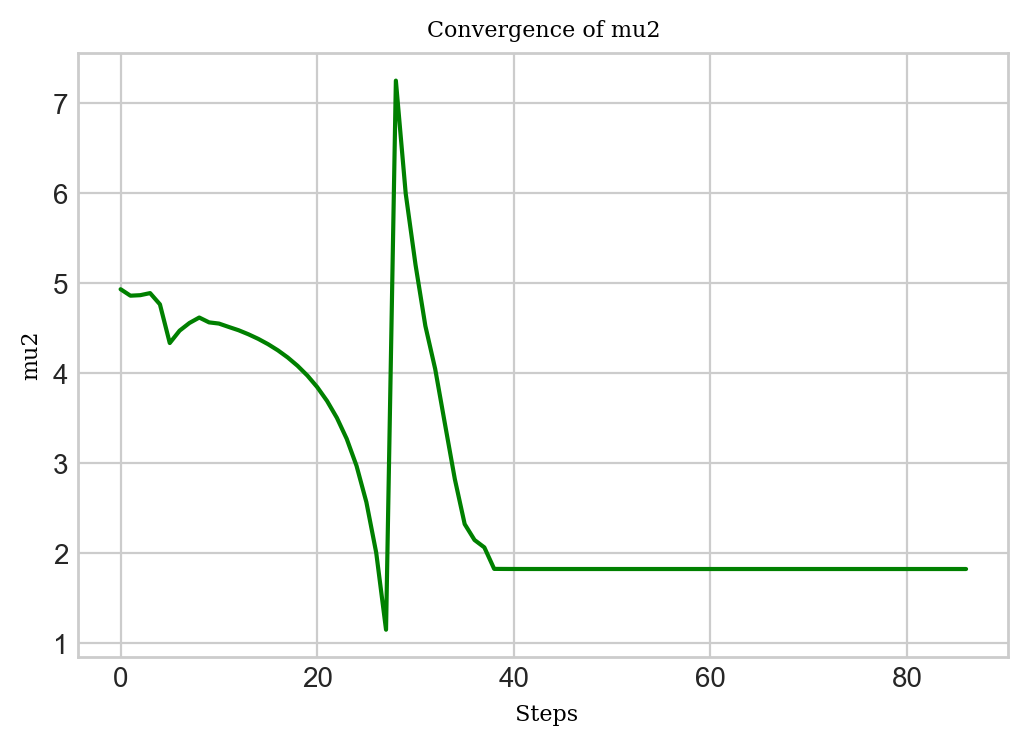

In [78]:
x1 = np.array([0.5, 3, 5])
figure(num=None, figsize=(6, 4), dpi=200, facecolor='w', edgecolor='k')
font = {'family': 'serif','color':  'black','weight': 'normal', 'size': 8,}
points_grad_ascent = gradient_ascent(x1, rate=0.0005)
plt.xlabel(" Steps", fontdict= font)
plt.ylabel("mu2", fontdict= font)
plt.title("Convergence of " + "mu2", fontdict=font)
plt.plot(points_grad_ascent.T[2], color= "green")
plt.show()

It was found that the Gradient ascent function is converging at some other local maxima point when  various starting points were considered. Hence starting point of 0.3, 1 and 2.5 considered best for the convergence.

## Problem 3

Implement the EM algorithm approach detailed in Question 11 to fit the parameter $\alpha$, $\mu_1$ and $\mu_2$. Compare the number of steps and the computation time of the EM algorithm to the gradient ascent method you used in Problem 2.

$z_i(\theta) = \frac{\alpha e^{-\mu_1}\mu_1^i}{\alpha e^{-\mu_1}{\mu_1^i}+ (1-\alpha)e^{-\mu_2}{\mu_2^i}}$

$\alpha_{m+1} = \frac{\sum_i n_iz_i(\theta_m)}{\sum_i n_i}$

$\mu_{m+1, 1} = \frac{\sum_i n_i i z_i(\theta_m)}{\sum_i n_i z_i(\theta_m)} $

$\mu_{m+1, 2} = \frac{\sum_i n_i i [1-z_i(\theta_m)]}{\sum_i n_i [1-z_i(\theta_m)]} $

In [61]:
def calc_zi(x0,i):
    """Function to calculate Zi
    Args: x0 an array with values of alpha, mu1 and mu2
    Return: zi value
    """
    alpha, mu1, mu2  = x0[0], x0[1], x0[2]    
    numerator = alpha* np.exp(-mu1)*mu1**i
    denomenator = alpha* np.exp(-mu1)*mu1**i + (1-alpha)*np.exp(-mu2)*mu2**i
    zi = numerator/denomenator
    return zi

def EM_calc(ni,i, z):
    """Function to Calculates alpha, mu1 and mu2
    Args: values of ni, zi and i to be used in the formula
    Return: Calculated values of alpha, mu1 and mu2
    """
    num_alpha = sum(np.array(ni)*np.array(z))  
    denom_alpha = sum(ni)
    alpha = num_alpha/denom_alpha
    
    num_mu1 = sum(ni*i*z)
    denom_mu1 = sum(ni*z)
    mu1 = num_mu1/denom_mu1
    
    num_mu2 = sum(ni*i*(1-z))
    denom_mu2 = sum(ni*(1-z))
    mu2 = num_mu2/denom_mu2
    
    return np.array([alpha, mu1, mu2])

In [64]:
def EM_max(x0):
    """Function for expectation maximization iteration
    Args: x0 an array with values of alpha, mu1 and mu2
    Return: new point with new values of alpha, mu1 and mu2
    """
    d =[100,100,100]
    zi = z_i(x0, deaths)
    count = 0
    new_point =[]
    while d[0] and d[1] and d[2] > 0:
        x = EM_calc(freq, deaths, zi)
        new_point.append(x)
        zi = z_i(x, deaths)
        d = abs(x - EM_calc(freq, deaths, zi))
        count += 1
    print("Estimated alpha = " + str(x[0]) +".");
    print("Estimated mu1 = " + str(x[1]) +".");
    print("Estimated mu2 = " + str(x[2])+ ".");
    print("Total step size = " + str(count) +".");
    return new_point

In [65]:
x0 = np.array([0.3, 1, 2.5])
points = EM_max(x0)

Estimated alpha = 0.35988539698473926.
Estimated mu1 = 1.2560951012239974.
Estimated mu2 = 2.6634043566322343.
Total step size = 6138.


In [70]:
%%timeit 
EM_max(x0)

Estimated alpha = 0.35988539698473926.
Estimated mu1 = 1.2560951012239974.
Estimated mu2 = 2.6634043566322343.
Total step size = 6138.
Estimated alpha = 0.35988539698473926.
Estimated mu1 = 1.2560951012239974.
Estimated mu2 = 2.6634043566322343.
Total step size = 6138.
Estimated alpha = 0.35988539698473926.
Estimated mu1 = 1.2560951012239974.
Estimated mu2 = 2.6634043566322343.
Total step size = 6138.
Estimated alpha = 0.35988539698473926.
Estimated mu1 = 1.2560951012239974.
Estimated mu2 = 2.6634043566322343.
Total step size = 6138.
Estimated alpha = 0.35988539698473926.
Estimated mu1 = 1.2560951012239974.
Estimated mu2 = 2.6634043566322343.
Total step size = 6138.
Estimated alpha = 0.35988539698473926.
Estimated mu1 = 1.2560951012239974.
Estimated mu2 = 2.6634043566322343.
Total step size = 6138.
Estimated alpha = 0.35988539698473926.
Estimated mu1 = 1.2560951012239974.
Estimated mu2 = 2.6634043566322343.
Total step size = 6138.
Estimated alpha = 0.35988539698473926.
Estimated mu1 = 

In [71]:
%%timeit
gradient_ascent(x0, rate=0.0005)

1.82 s ± 13.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Gradient Ascent method requires 14170total number of steps  to converge. However, the EM alogrithm requires only 6138 steps. Run time for the Gradient Ascent method is 1.82 s which almost twice of the runtime of EL Algorithm which is 972 ms. Hence EM method requires less time to converge.